**BUSINESS UNDERSTANDING**

SyriaTel is a telecommunications company in Syria that is experiencing customer churn. A percentage of their customers have discontinued use of their services for various reasons.
The impact of losing customers has serious financial implications as acquisition of new ones is much more difficult than customer retention.
A deep dive into the causes and customers expected to churn will give valuable insights to the sales and marketing teams.

**DATA EXPLORATION AND  UNDERSTANDING**

In [2]:
import pandas as pd 
import numpy as np 

In [3]:
# obtain the dataset and inspect it
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# check for numbr of rows and columns of the dataframe
df.shape

(3333, 21)

In [5]:
#display data frame summary and features
df.info()
features = df.columns.to_list()
print("Column names (features):", features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

*FEATURES:*

    -state: the state the customer lives in.
    -account length: the number of days the customer has had an account.
    -area code: the area code of the customer
    -phone number: the phone number of the customer
    -international plan: true if the customer has the international plan, otherwise false
    -voice mail plan: true if the customer has the voice mail plan, otherwise false
    -number vmail messages: the number of voicemails the customer has sent
    -total day minutes: total number of minutes the customer has been in calls during the day
    -total day calls: total number of calls the user has done during the day
    -total day charge: total amount of money the customer was charged by the Telecom company for calls during the day
    -total eve minutes: total number of minutes the customer has been in calls during the evening
    -total eve calls: total number of calls the customer has done during the evening
    -total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening
    -total night minutes: total number of minutes the customer has been in calls during the night
    -total night calls: total number of calls the customer has done during the night
    -total night charge: total amount of money the customer was charged by the Telecom company for calls during the night
    -total intl minutes: total number of minutes the user has been in international calls
    -total intl calls: total number of international calls the customer has done
    -total intl charge: total amount of money the customer was charged by the Telecom company for international calls
    -customer service calls: number of calls the customer has made to customer service
    -churn: true if the customer terminated their contract, otherwise false

***DATA CLEANING***

**1. Check for missing values, duplicated, irrelevant columns**

In [6]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

no missing values found

**2. Check for duplicates**

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

no duplicates found

In [18]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


***FEATURE ENGINEERING***

Churn will be the feature used for analysis 
Let's have a look at it's general distribution

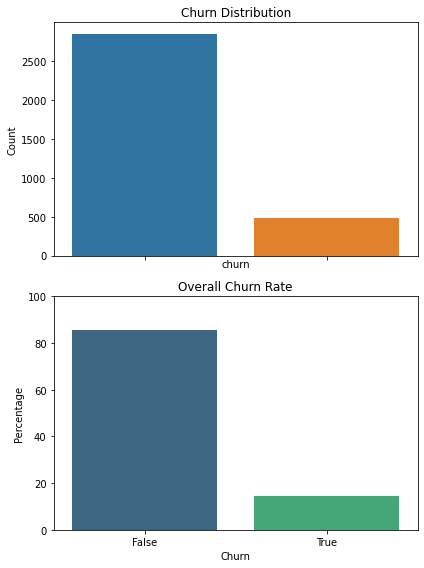

Churn Rate:
False    0.855086
True     0.144914
Name: churn, dtype: float64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

# Churn Distribution
sns.countplot(data=df, x='churn', ax=ax1)
ax1.set_title('Churn Distribution')
ax1.set_ylabel('Count')

# Overall Churn Rate
churn_rate = df['churn'].value_counts(normalize=True)
sns.barplot(x=churn_rate.index, y=churn_rate.values * 100, palette='viridis', ax=ax2)
ax2.set_xlabel('Churn')
ax2.set_ylabel('Percentage')
ax2.set_title('Overall Churn Rate')
ax2.set_ylim(0, 100)

# Show the plots
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print churn rate
print("Churn Rate:")
print(churn_rate)


**Correlation Heatmap**

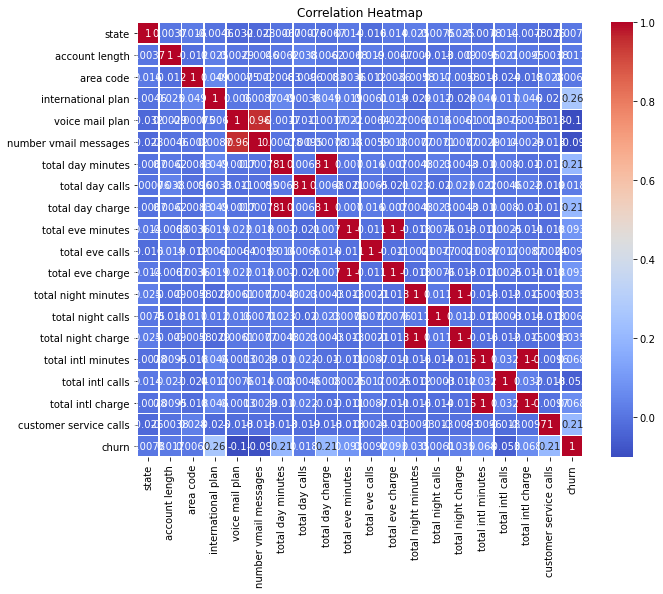

In [66]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


   The strongest correlations with churn are:
     - **Customer Service Calls**: A higher number of customer service calls is positively correlated with churn. Customers who make more service calls are more likely to churn.
     - **Total Day Minutes**: Customers with higher total day call minutes are more likely to churn.
     - **Total Day Charge**: Similar to total day minutes, higher charges during the day are associated with churn.
     - **International Plan**: Having an international plan (indicated by "yes") is positively correlated with churn. Customers with international plans are more likely to churn.
     - **Voice Mail Plan**: Surprisingly, having a voice mail plan (indicated by "yes") is negatively correlated with churn. Customers with voice mail plans are less likely to churn.


***Churn Across Categorical Features***

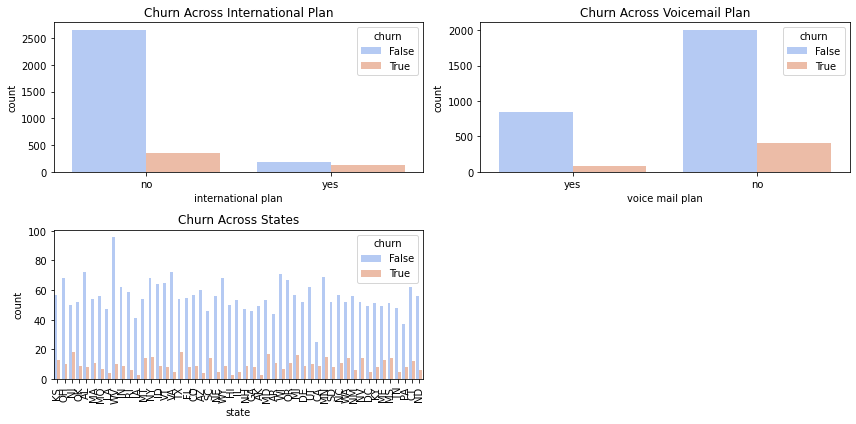

In [10]:

#1
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.countplot(x="international plan", hue="churn", data=df, palette="coolwarm")
plt.title("Churn Across International Plan")

#2
plt.subplot(2, 2, 2)
sns.countplot(x="voice mail plan", hue="churn", data=df, palette="coolwarm")
plt.title("Churn Across Voicemail Plan")

#3
plt.subplot(2, 2, 3)
sns.countplot(x="state", hue="churn", data=df, palette="coolwarm")
plt.title("Churn Across States")
plt.xticks(rotation=90)

# # Churn vs. Area Code
# plt.subplot(2, 2, 4)
# sns.boxplot(x="churn", y="area code", data=df, palette="coolwarm")
# plt.title("Churn vs. Area Code")

plt.tight_layout()
plt.show()

Churn across international plan and voicemail plans show that those who use these services are the least likely to churn

***Churn Across Numerical Features***

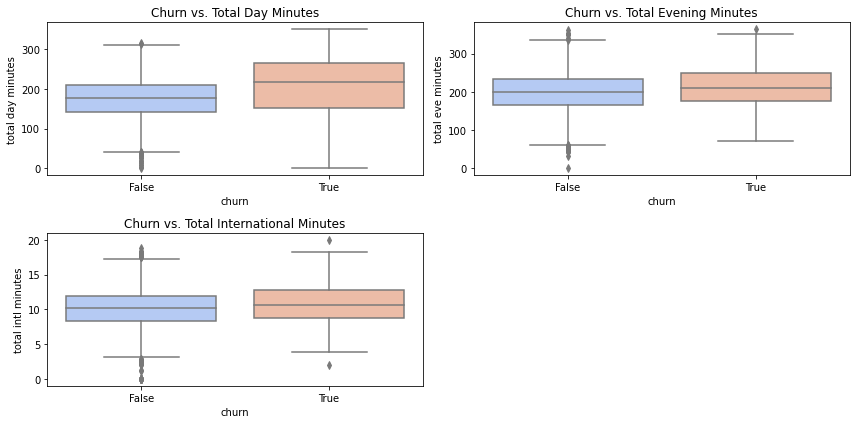

In [11]:

#1
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x="churn", y="total day minutes", data=df, palette="coolwarm")
plt.title("Churn vs. Total Day Minutes")

#2
plt.subplot(2, 2, 2)
sns.boxplot(x="churn", y="total eve minutes", data=df, palette="coolwarm")
plt.title("Churn vs. Total Evening Minutes")

#3
plt.subplot(2, 2, 3)
sns.boxplot(x="churn", y="total intl minutes", data=df, palette="coolwarm")
plt.title("Churn vs. Total International Minutes")

plt.tight_layout()
plt.show()



**Churn vs. Total Day Minutes:**

Customers who did not churn (False) generally have fewer total day minutes compared to those who churned (True).
The box plot for churned customers (True) shows a wider spread of day minutes.

**Churn vs. Total Evening Minutes:**
Similar to day minutes, customers who churned tend to have higher total evening minutes.
The box plot for churned customers (True) has a longer upper whisker.

**Churn vs. Total International Minutes:**

There isn’t a significant difference in international minutes between customers who churned and those who didn’t.
Both box plots (True and False) are relatively similar.

 *The data suggests that higher total day and evening minutes may be associated with churn.*

**Churn By Customers with International plan**

Text(0.5, 1.0, 'Distribution of International Plan')

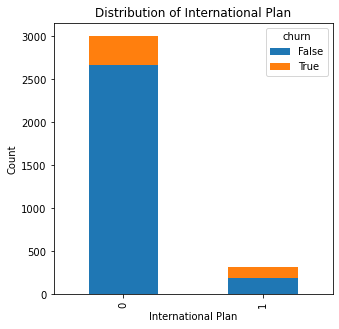

In [67]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

# Add labels and title
plt.xlabel("International Plan")
plt.ylabel("Count")
plt.title("Distribution of International Plan")



The group without an international plan has a higher total count and a slightly higher churn rate. 

**Churn By Customers with Voice mail plan**

Text(0.5, 1.0, 'Distribution of voice mail plan')

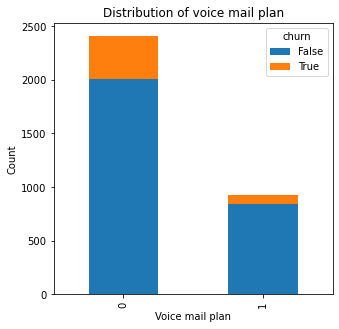

In [65]:
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

# Add labels and title
plt.xlabel("Voice mail plan")
plt.ylabel("Count")
plt.title("Distribution of voice mail plan")

The group without a voice mail plan has a higher total count and a slightly higher churn rate.

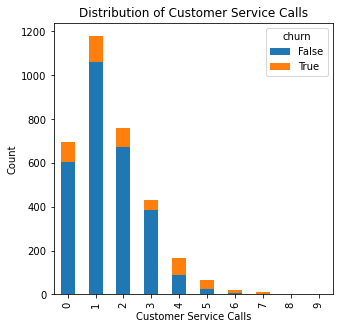

In [64]:
df.groupby(["customer service calls", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 
import pandas as pd
import matplotlib.pyplot as plt

# Add labels and title
plt.xlabel("Customer Service Calls")
plt.ylabel("Count")
plt.title("Distribution of Customer Service Calls")

# Show the plot
plt.show()


**Encode categorical cols**

In [35]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns
encoder = OneHotEncoder(drop="first", sparse=False)
X_encoded = encoder.fit_transform(df[categoric_cols])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categoric_cols))

# Print the first few rows of the encoded dataset
print(X_encoded_df.head())


   state_AL  state_AR  state_AZ  state_CA  state_CO  state_CT  state_DC  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

   state_DE  state_FL  state_GA  ...  state_VA  state_VT  state_WA  state_WI  \
0       0.0       0.0       0.0  ...       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0  ...       0.0       0.0       0.0       0.0   
2       0.0       0.0       0.0  ...       0.0       0.0       0.0       0.0   
3       0.0       0.0       0.0  ...       0.0       0.0       0.0       0.0   
4       0.0       0.0       0.0  ...       0.0       0.0       0.0       0.0   

   state_WV  state_WY  area code_415  area code_510  international p

c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
numeric_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']

In [49]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# State is a string and we want discreet integer values
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

#print (df['Voice mail plan'][:4])
print (df.dtypes)

state                       int64
account length              int64
area code                   int64
phone number               object
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [50]:
# Inspect the features (X_train)
print("Features (X_train):")
print(X_train.head())

# Inspect the target variable (y_train)
print("\nTarget variable (y_train):")
print(y_train.head())


Features (X_train):
      state  account length  area code  international plan  voice mail plan  \
817      44             243        510                   0                0   
1373     40             108        415                   0                0   
679      43              75        415                   1                0   
56        5             141        415                   0                0   
1993     15              86        510                   0                0   

      number vmail messages  total day minutes  total day calls  \
817                       0               95.5               92   
1373                      0              112.0              105   
679                       0              222.4               78   
56                        0              126.9               98   
1993                      0              216.3               96   

      total day charge  total eve minutes  total eve calls  total eve charge  \
817              16.24

In [48]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate features and target variable (excluding 'phone number')
X = df.drop(columns=["churn", "phone number"])
y = df["churn"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print the new class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())


Class distribution after SMOTE:
True     2284
False    2284
Name: churn, dtype: int64


Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the features 
X_train_scaled = scaler.fit_transform(X_train_smote)

# Transform the test features 
X_test_scaled = scaler.transform(X_test)

In [55]:
X

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,6,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Simple logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the performance using appropriate metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logreg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logreg):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_logreg):.4f}")

Logistic Regression Metrics:
Accuracy: 0.8456
Precision: 0.4167
Recall: 0.0495
F1 Score: 0.0885


c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The model has decent accuracy but low precision and recall.

In [57]:
# Adjusting the number of iterations
logreg_model_adjusted = LogisticRegression(max_iter=1000)  # Increase max_iter to 1000
logreg_model_adjusted.fit(X_train, y_train)

# make predictions
y_pred_logreg_adjusted = logreg_model_adjusted.predict(X_test)

# Evaluate the performance using appropriate metrics
print("Adjusted Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg_adjusted):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logreg_adjusted):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logreg_adjusted):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_logreg_adjusted):.4f}")


Adjusted Logistic Regression Metrics:
Accuracy: 0.8516
Precision: 0.5357
Recall: 0.1485
F1 Score: 0.2326


c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


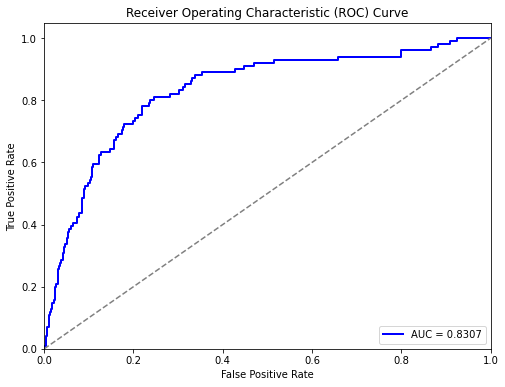

AUC: 0.8307


In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate predicted probabilities for the positive class
y_pred_prob = logreg_model_adjusted.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.4f}")

The logistic regression model with an AUC of **0.8307** has a **low recall** value of **0.1485**. This indicates that it misses a significant number of positive instances. That  is, it does not properly identify churned customers

WE will explore alternative algorithms

NOt much of a difference. We will explore other models

**Random Forest**

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a random forest model
rf_model = RandomForestClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the performance using appropriate metrics
print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")


Random Forest Metrics:
Accuracy: 0.9445
Precision: 0.9485
Recall: 0.6582
F1 Score: 0.7771


The model is more accurate at 94%, more precise as 0.95 is really close to zero. It however only captures 66% of churned cases

**Decision Tree Classification**

In [69]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model (you can adjust the maximum depth)
dt_model = DecisionTreeClassifier(max_depth=5)

# Fit the decision tree model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the performance using appropriate metrics
print("\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt):.4f}")


Decision Tree Metrics:
Accuracy: 0.9370
Precision: 0.8831
Recall: 0.6733
F1 Score: 0.7640
